In [34]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

fig_path = "figures/"
fig_save = True

In [35]:
# defining spatial deritivative functions
def spatial_derivative(B, dx, order = 6, ghost_zone_type = 'relative anti-symmetric'):
    '''
    This function calculates the spatial derivatives of the magnetic field B.
    
    Parameters:
    B: 2D array
        The magnetic field B.
    dx: float
        The spatial step size.
    order: int
        The order of the finite difference scheme. It can be 2, 4, 6, 8 or 10.
        Default is 6.
    ghost_zone_type: str
        The type of the ghost zone. It can be 'anti-symmetric', 'symmetric', 'relative anti-symmetric' or None.
        Default is 'relative anti-symmetric'.
        
    Returns:
    dBdx: 2D array
        The spatial-derivative of the magnetic field B.
    ddBddx: 2D array
        The second z-derivative of the magnetic field B.
    '''

    dBdx = np.zeros(B.shape)
    ddBddx = np.zeros(B.shape)

    # print(f"The shape of B is {B.shape}")
    # print(f"The shape of dBdx is {dBdx.shape}")
    # print(f"The shape of ddBddx is {ddBddx.shape}")
    
    B = np.copy(B) # to avoid modifying the original array
    
    if order not in ['np',2, 4, 6, 8, 10]:
        raise ValueError("Order should be 'np',2, 4, 6, 8 or 10")
    
    if ghost_zone_type not in ['anti-symmetric', 'symmetric', 'relative anti-symmetric', None]:
        raise ValueError('ghost_zone_type should be anti-symmetric, symmetric, relative anti-symmetric or None')

    if order == 'np':
        ghost_zone = 3 # 3 cells on each side
    else:
        ghost_zone = int(order/2)
    
    if ghost_zone_type == 'relative anti-symmetric':
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='constant')
        for i in range(ghost_zone):
            B[:,i] = (2 * B[:,ghost_zone]) - B[:,ghost_zone + ghost_zone - i] # correcting the start of the array
            B[:, -1 - i] = 2 * B[:,-ghost_zone - 1] - B[:, (- ghost_zone - 1) - ghost_zone + i] # correcting the end of the array
    elif ghost_zone_type == 'anti-symmetric':
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='reflect') # makes symmetric padding
        for i in range(ghost_zone): 
            B[:,i] = - B[:, i] # making anti-symmetric at the start of the array
            B[:, -1 - i] = - B[:, -1 - i] # making anti-symmetric at the end of the array
    elif ghost_zone_type == 'symmetric':
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='symmetric')
    else:
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='constant') # zero padding

    # print(f"The shape of B after padding is {B.shape}")
    # print(f"The shape of dBdx after padding is {dBdx.shape}")
    # print(f"The shape of ddBddx after padding is {ddBddx.shape}")
    
    if order == 6:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((- B[:,i - 3]) + (9 * B[:,i - 2]) - (45 * B[:,i - 1]) + (45 * B[:,i + 1]) - (9 * B[:,i + 2]) + (B[:,i + 3])) / (60 * dx)
            ddBddx[:,i-ghost_zone] = ((2 * B[:,i - 3]) - (27 * B[:,i - 2]) + (270 * B[:,i - 1]) - (490 * B[:, i]) + (270 * B[:,i + 1]) - (27 * B[:,i + 2]) + (2 * B[:,i + 3])) / (180 * (dx ** 2))
    elif order == 2:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((- B[:,i - 1]) + (B[:,i + 1])) / (2 * dx)
            ddBddx[:,i-ghost_zone] = (B[:,i - 1] - (2 * B[:, i]) + B[:,i + 1]) / (dx ** 2)
    elif order == 4:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((B[:,i - 2]) - (8 * B[:,i - 1]) + (8 * B[:,i + 1]) - (B[:,i + 2])) / (12 * dx)
            ddBddx[:,i-ghost_zone] = ((- B[:,i - 2]) + (16 * B[:,i - 1]) - (30 * B[:,i]) + (16 * B[:,i + 1]) - (B[:,i + 2])) / (12 * (dx ** 2))
    elif order == 8:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((3*B[:,i - 4]) - (32 * B[:,i - 3]) + (168 * B[:,i - 2]) - (672 * B[:,i - 1]) + (672 * B[:,i + 1]) - (168 * B[:,i + 2]) + (32 * B[:,i + 3]) - (3 * B[:,i + 4])) / (840 * dx)
            ddBddx[:,i-ghost_zone] = ((-9 * B[:,i - 4]) + (128 * B[:,i - 3]) - (1008 * B[:,i - 2]) + (8064 * B[:,i - 1]) - (14350 * B[:,i]) + (8064 * B[:,i + 1]) - (1008 * B[:,i + 2]) + (128 * B[:,i + 3]) - (9 * B[:,i + 4])) / (5040 * (dx ** 2))
    elif order == 10:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((-2 * B[:,i - 5]) + (25 * B[:,i - 4]) - (150 * B[:,i - 3]) + (600 * B[:,i - 2]) - (2100 * B[:,i - 1]) + (2100 * B[:,i + 1]) - (600 * B[:,i + 2]) + (150 * B[:,i + 3]) - (25 * B[:,i + 4]) + (2 * B[:,i + 5])) / (2520 * dx)
            ddBddx[:,i-ghost_zone] = ((8 * B[:,i - 5]) - (125 * B[:,i - 4]) + (1000 * B[:,i - 3]) - (6000 * B[:,i - 2]) + (42000 * B[:,i - 1]) - (73766 * B[:, i]) + (42000 * B[:,i + 1]) - (6000 * B[:,i + 2]) + (1000 * B[:,i + 3]) - (125 * B[:,i + 4]) + (8 * B[:,i + 5])) / (25200 * (dx ** 2))
    else:
        dBdx = np.gradient(B, dx, axis=1)
        ddBddx = np.gradient(dBdx, dx, axis=1)
        
        # removing the ghost zones
        dBdx = dBdx[:,ghost_zone:-ghost_zone]
        ddBddx = ddBddx[:,ghost_zone:-ghost_zone]
            
    # update with other orders
    
    return dBdx, ddBddx

In [36]:
def simulate_B_z_field(z_i, z_f, Nz, T, Nt, B_r0, B_phi0, dBdt, order = 6, ghost_zone_type = 'symmetric', iterations_to_save = None):
    '''    
    This function simulates the time evolution of the magnetic field B.
    
    Parameters:
    z_i: float
        The start of the spatial domain.
    z_f: float
        The end of the spatial domain.
    Nz: int
        The number of spatial grid points.
    T: float
        The total simulation time.
    Nt: int
        The number of time steps.
    B_r0: function
        The initial condition for the magnetic field B_r.
    B_phi0: function
        The initial condition for the magnetic field B_phi.
    dBdt: function
        The time evolution of the magnetic field B.
    order: int
        The order of the finite difference scheme. It can be 'np', 2, 4, 6, 8 or 10.
        Default is 6.
    ghost_zone_type: str
        The type of the ghost zone. It can be 'anti-symmetric', 'symmetric', 'relative anti-symmetric' or None.
        Default is 'relative anti-symmetric'.
    iterations_to_save: list
        A list of the time steps to save the solution.
        If None, it will save the solution at the start and end of the simulation.
        If 'all', it will save the solution at every time step.
        
    Returns:
    B_list: 3-D array
        A list of the magnetic field B at the required time steps from iterations_to_save.
        size: (len(iterations_to_save), 2, Nz)
    '''
    dz = (z_f - z_i) / (Nz - 1)  # Spatial step size
    dt = T / Nt  # Temporal step size
    
    # Create arrays to store the solution in time
    B_list = []

    # creating initial conditions from z, B_r0 and B_phi0
    z = np.linspace(z_i, z_f, Nz)
    B = np.zeros((2, Nz))
    B[0, :] = B_r0(0, 0, z) # first row is B_r
    B[1, :] = B_phi0(0, 0, z) # second row is B_phi
    
    if iterations_to_save is None:
        iterations_to_save = [0, Nt]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(0, Nt + 1))

    if 0 in iterations_to_save:
        B_list.append(np.copy(B))
    
    #--------- RK4 time-stepping block ---------#
    for n in tqdm(range(1, Nt + 1)):
        # Compute spatial derivatives
        dBdz, ddBddz = spatial_derivative(B, dz, order, ghost_zone_type)


        k1 = dBdt(B, dBdz, ddBddz, n * dt)
        k2 = dBdt(B + (0.5 * dt * k1), dBdz, ddBddz, (n * dt) + (0.5 * dt))
        k3 = dBdt(B + (0.5 * dt * k2), dBdz, ddBddz, (n * dt) + (0.5 * dt))
        k4 = dBdt(B + (dt * k3), dBdz, ddBddz, (n * dt) + dt)
        
        B = B + (dt / 6.0) * (k1 + (2 * k2) + (2 * k3) + k4)
        
        # print(B)
        
        if n in iterations_to_save:
            B_list.append(np.copy(B))
    #------------------------------------------#
    
    B_list = np.array(B_list)
    
    return B_list

In [40]:

delta = 0.01 # safety net to avoid division by zero
z_i = 0 + delta  # start of spatial domain
z_f = 4  + delta # end of spatial domain
T = 10  # Total simulation time
Nz = 50  # Number of spatial grid points
Nt_z = 8000  # Number of time steps

# order = 'np'
order = 6
ghost_zone_type = 'symmetric'

iterations_to_save = [int(i * Nt_z/10) for i in range(10 + 1)] # which time steps to save

# defining initial conditions
def B_phi0_z(r, phi, z):
    return (3 * np.cos(((z - z_i)/(z_f - z_i))*np.pi))
def B_r0_z(r, phi, z): # temporary; since we are solving the same equation in r and phi; not using now
    return 0 

# definiing the time evolution of the magnetic field
def dBdt_z(B, dBdz, ddBdz, t):
    return ddBdz

In [41]:
# plotting initial conditions
z = np.linspace(z_i, z_f, Nz)
B = np.zeros((2, Nz))

In [42]:
# running the simulation
B_list = simulate_B_z_field(z_i, z_f, Nz, T, Nt_z, B_r0_z, B_phi0_z, dBdt_z, order, ghost_zone_type, iterations_to_save)

100%|██████████| 8000/8000 [00:21<00:00, 377.62it/s]


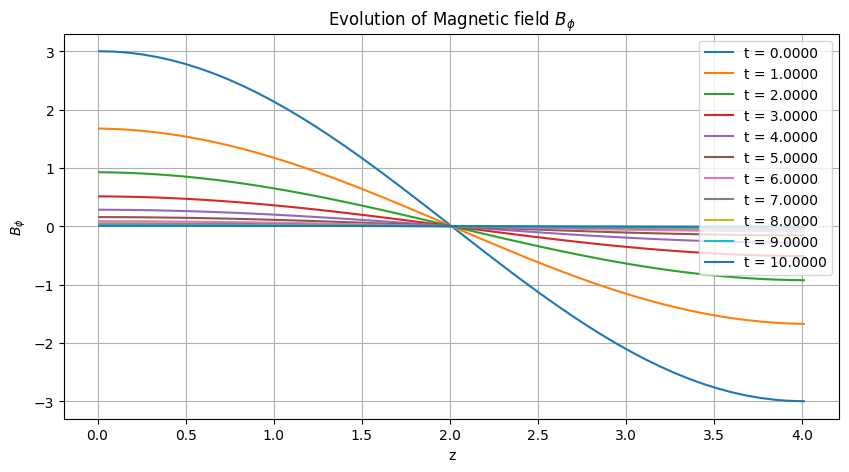

In [44]:
plt.figure(figsize=(10, 5))
plt.title(r'Evolution of Magnetic field $B_{\phi}$')
plt.xlabel(r'z')
plt.ylabel(r'$B_{\phi}$')
plt.grid(True)
for i in range(len(iterations_to_save)):
    plt.plot(np.linspace(z_i, z_f, Nz), B_list[i, 1, :], label=f't = {iterations_to_save[i] * T / Nt_z:.4f}')
plt.legend()
if fig_save:
    plt.savefig(fig_path + "evolution_B_phi_z.png")
plt.show()